In [1]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import seaborn as sns
# import os
# from glob import glob
# import numpy as np
from level2_utils import get_data_for_confirmed_train_subjs, read_yaml_for_host
# from level2_utils import *

import sys
sys.path.append('/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/analyses/intervention_moderation/')
from dev_interaction_util import load_groups_from_mastersheet
sys.path.append('/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/')
import level2.level2_utils



config_data = read_yaml_for_host("l2_config.yml")
# nonbids_data_path = config_data['nonbids_data_path']
# ml_data_folderpath = nonbids_data_path + "fMRI/ml"
# dev_scripts_path = config_data['dev_scripts_path']
# ml_scripting_path = dev_scripts_path + "/fMRI/ml"
dropbox_datapath = config_data['dropbox_datapath']
sst_level_2_path = config_data['sst_level_2_path']

spm_path = config_data['spm_path']

analysis_name = 'health_conditions'

output_name = analysis_name + '_groups'

groups_by_name = load_groups_from_mastersheet(dropbox_datapath + 'DEV Participant Mastersheet_copy.xlsx')


Benjamins-MacBook-Pro-3.local


In [2]:
sys.path.append('/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/')
import modeling_utils

In [3]:
sst_level_2_path

'/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/level2/SST/'

In [4]:
dir_for_analysis = sst_level_2_path + 'health_conditions_groups_20240103/raw_filelist.csv'

In [5]:
analysis_subject_table_raw = pd.read_csv(dir_for_analysis,index_col=0)
groups_by_name = load_groups_from_mastersheet(dropbox_datapath + 'DEV Participant Mastersheet_copy.xlsx')

#merge on subject ID
analysis_subject_table = analysis_subject_table_raw.merge(groups_by_name, how='left', left_on='subject_id', right_on='dev_id')

In [7]:
# print(set(analysis_subject_table_raw.subject_id).difference(set(included_subjects)))
# print(set(included_subjects).difference(set(analysis_subject_table_raw.subject_id)))

Now filter on data quality.

In [8]:
config_data

{'sst_wave1_path': '/Users/benjaminsmith/Google Drive/oregon/data/DEV/nonbids_data/fMRI/fx/models/SST/wave1/',
 'sst_allwaves_path': '/Users/benjaminsmith/Google Drive/oregon/data/DEV/nonbids_data/fMRI/fx/models/SST/all_waves/',
 'spm_l2_script_template_filepath': '/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/level2/template_one_sample_design_estimate.m',
 'spm_l2_script_w_confounders_template_filepath': '/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/level2/template_one_sample_with_confounders_design_estimate.m',
 'confounder_template_path': '/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/level2/template_one_sample_with_confounders_confounder.m',
 'nonbids_data_path': '/Users/benjaminsmith/Google Drive/oregon/data/DEV/nonbids_data/',
 'dev_scripts_path': '/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts',
 'sst_level_2_path': '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN 

In [9]:
train_betas_with_data = modeling_utils.get_sst_data_for_confirmed_sessions_across_tasks(
    beta_glob = config_data['nonbids_data_path'] + "fMRI/fx/models/SST/all_waves/health_conditions/sub-DEV*/",
    #nonbids_data_path = config_data['nonbids_data_path'],
    #ml_data_folderpath = ml_data_folderpath,
    #ml_scripting_path = config_data['dev_scripts_path'] + "/fMRI/ml",
    dropbox_datapath=config_data['dropbox_datapath'],
    subj_wave_inclusion='all',
    automotion_datapath = config_data['automotion_output_path'],
)


included_subjects = train_betas_with_data['subject_id'].unique()
del train_betas_with_data

loaded 275 rows from data_by_ppt.csv


/Users/benjaminsmith/anaconda/envs/neuroanalysis/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


(250, 2) (275, 173) (287, 175)
(543, 42) (571, 51) (572, 95)
(287, 176) (572, 95) (574, 270)
['beta_subject_id', 'SID', 'subject_id', 'redcap_dev_id', 'redcap_wave', 'labelled_exclusion_wave', 'labelled_exclusion_missing wave', 'wave_id', 'automotion_exclude_wave']


/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/modeling_utils.py:617: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_by_session.loc[:,col + '_quality'] = all_data_by_session[col].apply(lambda x: 1 if x=='No reported problems' else 0)
/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/modeling_utils.py:617: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_by_session.loc[:,col + '_quality'] = all_data_by_session[col].apply(lambda x: 1 if x=='No rep

subjects who did or did not pass the scanner room report check:
redcap_SST
Investigate               8
May not be usable         6
Minor problems           35
No reported problems    536
Unusable                 25
dtype: int64
redcap_SST_quality
1    536
0    106
Name: count, dtype: int64
subjects who did or did not pass the auto motion check:
automotion_exclude_SST1_quality
1    527
0    115
Name: count, dtype: int64
subjects who did or did not pass the labelled data check motion check:
labelled_exclusion_SST_Exclude_quality
1    603
0     39
Name: count, dtype: int64


/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/modeling_utils.py:677: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_by_session['combined_' + task + str(run_i) + '_quality' + str(run_i)] = (
/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/modeling_utils.py:677: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_by_session['combined_' + task + str(run_i) + '_quality' + str(run_i)] = (
/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI

In [10]:
# roi_table_path = sst_level_2_path + 'health_conditions_groups_20240103/Unhealthy_NoGo(W2-W1)/rois_raw.csv'

# roi_table_1 = pd.read_csv(roi_table_path)
# roi_table_insula_path = sst_level_2_path + 'health_conditions_groups_20240103/Unhealthy_NoGo(W2-W1)/rois_raw_insula.csv'
# roi_table_insula = pd.read_csv(roi_table_insula_path)



# spm_roi_table = pd.concat([roi_table_1,roi_table_insula],axis=1)

In [11]:
# spm_roi_table_vars = spm_roi_table.columns.values

In [25]:
roi_table_functional_path = '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/data/subject_sst_health_avg_roi_data_raw_zscored2_w_sigs.csv'
roi_table_functional = pd.read_csv(roi_table_functional_path,index_col=0)


In [26]:
roi_table_functional.mask_label.unique()

array(['CS-CG_conditions_20231108_spmT_0001',
       'CS-FS_conditions_20231108_spmT_0001',
       'CueFollowing(CS>FS)striatal_cluster_combined_20221207',
       'CueFollowing(CS>FS)striatal_cluster_combined',
       'CueFollowing(CS>FS)striatal_cluster_combined_20230512',
       'CS_conditions_20231108_spmT_0001', 'striatum_joint_mask',
       'striatum_joint_mask_t50',
       'harvardoxford-subcortical_prob_Left Putamen',
       'harvardoxford-subcortical_prob_Right Accumbens',
       'harvardoxford-subcortical_prob_Right Putamen',
       'harvardoxford-subcortical_prob_Left Accumbens',
       'harvardoxford-subcortical_prob_Left Caudate',
       'harvardoxford-subcortical_prob_Right Caudate',
       'value_association-test_z_FDR_0.01_t9',
       'fmc_paracing_t25_value_t5', 'fmc_paracingulate_t50',
       'response inhibition_association-test_z_FDR_0.01_t5'], dtype=object)

In [34]:
roi_table_functional.loc[(roi_table_functional.condition=='Stop') & (roi_table_functional.mask_label=='CS-CG_conditions_20231108_spmT_0001'),]

,subject_id,wave,spm_output_path,condition,beta_name,mask_label,roi_activity
0,DEV014,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,0.906687
1,DEV015,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,1.483438
2,DEV017,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,2.011431
3,DEV019,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,0.827191
4,DEV021,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,1.653986
...,...,...,...,...,...,...,...
168,DEV307,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,1.054213
169,DEV308,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,1.508639
170,DEV309,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,0.812824
171,DEV310,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,2.157992


In [44]:
roi_table_functional.loc[(roi_table_functional.subject_id=='DEV014') &(roi_table_functional.condition=='Stop'),].sort_values(['condition','mask_label'])['mask_label'].value_counts()

mask_label
value_association-test_z_FDR_0.01_t9                     2
striatum_joint_mask_t50                                  2
striatum_joint_mask                                      2
response inhibition_association-test_z_FDR_0.01_t5       2
fmc_paracing_t25_value_t5                                2
fmc_paracingulate_t50                                    2
harvardoxford-subcortical_prob_Left Putamen              1
harvardoxford-subcortical_prob_Right Putamen             1
harvardoxford-subcortical_prob_Right Caudate             1
harvardoxford-subcortical_prob_Right Accumbens           1
CS-CG_conditions_20231108_spmT_0001                      1
CS-FS_conditions_20231108_spmT_0001                      1
harvardoxford-subcortical_prob_Left Accumbens            1
CueFollowing(CS>FS)striatal_cluster_combined_20230512    1
CueFollowing(CS>FS)striatal_cluster_combined_20221207    1
CueFollowing(CS>FS)striatal_cluster_combined             1
CS_conditions_20231108_spmT_0001             

In [27]:
roi_table_functional_mask_names = roi_table_functional.mask_label.unique()
#transform wider using mask_label as the column names and roi_activity as the values
roi_table_functional_wide = roi_table_functional.pivot(
    index=['subject_id'],
    columns=['condition','mask_label'],
    values='roi_activity')

#now flatten the column names
roi_table_functional_wide.columns = ['_'.join(col).strip() for col in roi_table_functional_wide.columns.values]
roi_table_functional_wide = roi_table_functional_wide.reset_index()

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# [df.columns[0:5] for df in [analysis_subject_table,spm_roi_table, roi_table_functional_wide[roi_table_functional_wide.columns]]]

In [ ]:
roi_table_functional_wide.columns

Index(['subject_id',
       'Unhealthy_NoGo(W2-W1)_response inhibition_association-test_z_FDR_0.01',
       'Unhealthy_NoGo(W2-W1)_value_association-test_z_FDR_0.01',
       'Unhealthy_NoGo(W2-W1)_striatum_joint_reward_mask',
       'Unhealthy_NoGo(W2-W1)_value_association_frontal_medial_cortex',
       'Unhealthy_Go(W2-W1)_response inhibition_association-test_z_FDR_0.01',
       'Unhealthy_Go(W2-W1)_value_association-test_z_FDR_0.01',
       'Unhealthy_Go(W2-W1)_striatum_joint_reward_mask',
       'Unhealthy_Go(W2-W1)_value_association_frontal_medial_cortex',
       'Stop(Healthy>Unhealthy)(W2-W1)_response inhibition_association-test_z_FDR_0.01',
       'Stop(Healthy>Unhealthy)(W2-W1)_value_association-test_z_FDR_0.01',
       'Stop(Healthy>Unhealthy)(W2-W1)_striatum_joint_reward_mask',
       'Stop(Healthy>Unhealthy)(W2-W1)_value_association_frontal_medial_cortex'],
      dtype='object')

In [ ]:
analysis_subject_table

,SID,beta_subject_id,subject_id,redcap_dev_id,data_by_ppt_merge_status,redcap_SST,labelled_exclusion_SST_Exclude,labelled_exclusion_WTP3_Exclude,labelled_exclusion_WTP4_Exclude,spm_output_path,...,contrast_Unhealthy_Go(W2-W1)_fname,contrast_Unhealthy_Go(W1-W2)_fname,contrast_Unhealthy_NoGo(W2-W1)_fname,contrast_Unhealthy_NoGo(W1-W2)_fname,contrast_Null_Cue(W2-W1)_fname,contrast_Null_Cue(W1-W2)_fname,contrast_Stop(Healthy>Unhealthy)(W2-W1)_fname,contrast_Stop(Healthy>Unhealthy)(W1-W2)_fname,dev_id_y,intervention_group
0,DEV014,DEV014,DEV014,DEV014,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV014,mckenzie
1,DEV015,DEV015,DEV015,DEV015,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV015,mckenzie
2,DEV017,DEV017,DEV017,DEV017,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV017,willamette
3,DEV019,DEV019,DEV019,DEV019,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV019,mckenzie
4,DEV021,DEV021,DEV021,DEV021,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV021,willamette
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,DEV307,DEV307,DEV307,DEV307,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV307,mckenzie
169,DEV308,DEV308,DEV308,DEV308,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV308,willamette
170,DEV309,DEV309,DEV309,DEV309,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV309,umpqua
171,DEV310,DEV310,DEV310,DEV310,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV310,mckenzie


In [ ]:
# spml2_derived = pd.concat([analysis_subject_table,spm_roi_table],axis=1)
spml2_derived=analysis_subject_table

subjects_with_rois = pd.merge(spml2_derived,roi_table_functional_wide,how='left',on='subject_id')

roi_table_functional_mask_names = roi_table_functional_wide.columns.values[1:]

In [ ]:
subjects_with_rois = pd.merge(spml2_derived,roi_table_functional_wide,how='left',on='subject_id')

OK, we have the data, now let's do some contrasts. Contrast umpqua and mckenzie with willamette on both ROIs using a t-test

In [ ]:
roi_colnames = roi_table_functional_mask_names.tolist()

In [ ]:
# subjects_with_rois.loc[subjects_with_rois['intervention_group'] == 'willamette',['subject_id',roi_colnames]]

In [ ]:
for roi_colname in roi_colnames:
    print(roi_colname)
    for experimental_group in ['umpqua','mckenzie']:
        print(experimental_group)
        control_group_data = subjects_with_rois.loc[subjects_with_rois['intervention_group'] == 'willamette',roi_colname]
        experimental_group_data = subjects_with_rois.loc[subjects_with_rois['intervention_group'] == experimental_group,roi_colname]
        #do independent-samples t-test

        t,p = ttest_ind(control_group_data,experimental_group_data)
        print('cont: ' + str(np.mean(control_group_data)) + '; exp: ' + str(np.mean(experimental_group_data)))
        print("t-score: " + str(t) + "; p-val: " + str(p))
    print("")
        
        

Unhealthy_NoGo(W2-W1)_response inhibition_association-test_z_FDR_0.01
umpqua
cont: -0.017759141503213643; exp: -0.05093552131094525
t-score: 1.0268562882788275; p-val: 0.3066431734707861
mckenzie
cont: -0.017759141503213643; exp: -0.03541359269972742
t-score: 0.4865197337242223; p-val: 0.6275937492836503

Unhealthy_NoGo(W2-W1)_value_association-test_z_FDR_0.01
umpqua
cont: 0.0325483765882505; exp: -0.002457912694399365
t-score: 0.7115582946484881; p-val: 0.47817924508011267
mckenzie
cont: 0.0325483765882505; exp: -0.042251668484270484
t-score: 1.5090034406121062; p-val: 0.1342451440867169

Unhealthy_NoGo(W2-W1)_striatum_joint_reward_mask
umpqua
cont: 0.02915720246382725; exp: -0.02620433455317946
t-score: 1.114471691229974; p-val: 0.2674006141978258
mckenzie
cont: 0.02915720246382725; exp: 0.015707810093491228
t-score: 0.24744380966986412; p-val: 0.8050389594512413

Unhealthy_NoGo(W2-W1)_value_association_frontal_medial_cortex
umpqua
cont: 0.03342500657846868; exp: 0.05940255658210501


In [ ]:
control_group_data

2      0.062803
4     -0.988117
11     0.459369
14    -0.912795
19     0.295335
23    -0.548938
24    -0.780473
25     0.608716
32     0.247727
37     1.030017
38    -0.646289
42     0.026704
43    -1.035766
46    -1.360390
53    -0.961814
54    -0.149061
64    -0.263498
65     0.477831
66     0.308169
68     0.557496
73     0.628929
76    -0.722931
77     0.706630
78     1.447597
80     0.009975
86     0.315049
90     0.071900
94     0.609649
96    -0.592574
104    0.365876
107    0.359560
114   -0.858075
117    0.123177
119   -0.626063
120    0.664642
126    0.122537
129   -0.283295
130   -0.361867
135   -0.969582
136    0.037225
140   -0.139345
142   -0.065630
147    1.158258
151    0.036190
156    0.869973
159   -0.614417
160   -0.658907
161    0.114682
162   -0.177686
164   -0.533321
166   -0.170276
167    0.612672
169   -0.035686
Name: Stop(Healthy>Unhealthy)(W2-W1)_value_association_frontal_medial_cortex, dtype: float64

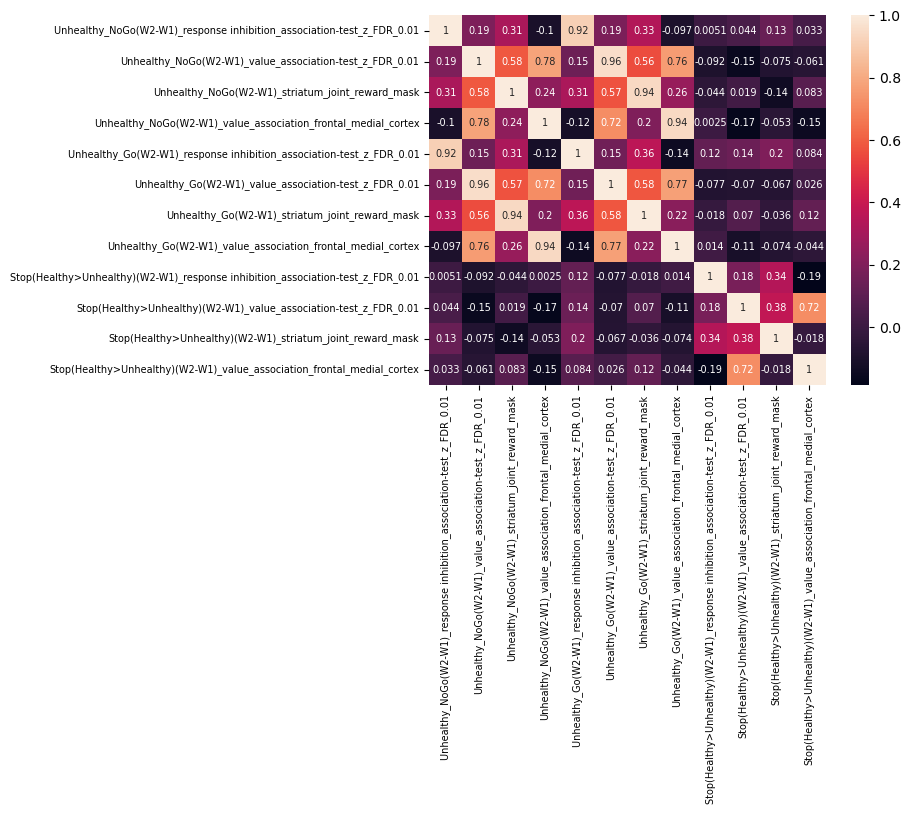

In [ ]:
import matplotlib.pyplot as plt
#do a correlation matrix plot for all the valuation_cols
import seaborn as sns



#now do the corrplot
#print a heatmap with two-digit correlation coefficients for each pair of variables
#use annot=True and dont' make the font size too big
corr = subjects_with_rois[roi_colnames].corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            annot_kws={"size": 7}
            )
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7)

plt.show()

Perhaps we don't have a proper control because all these ROIs are correlated, and they shouldn't be so highly correlated.

Could check this by getting the mean of each subject's image. If they're not zero, those would be driving the correlation, and we should be doing something different.

## Pre-registration summary

Overall, we found some evidence that 